In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file = "new_sets.csv"
df = pd.read_csv(file, index_col=0)

I clean the datasets here

In [4]:
desc = df["Description"].value_counts()
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Description,Quantity,UnitPrice,BroughtPrice,Profit,Logged OS
0,536365,2010-12-01,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,2.040,0.510,BlackBerry
1,536365,2010-12-01,17850.0,WHITE METAL LANTERN,6,3.39,2.712,0.678,IOS
2,536365,2010-12-01,17850.0,CREAM CUPID HEARTS COAT HANGER,8,2.75,2.200,0.550,IOS
3,536365,2010-12-01,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,2.712,0.678,Symbian
4,536365,2010-12-01,17850.0,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,2.712,0.678,IOS


# Product should be kept

##### We can see here in the bar Chart the items need to be kept and order more quantity and we can answer the question what product most profitable and product to be kept

C:\Users\Daryo\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


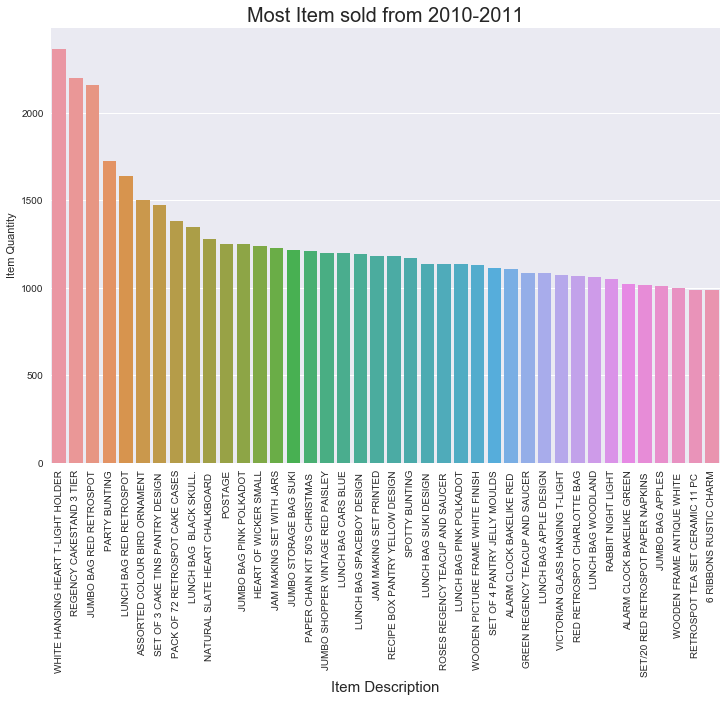

In [4]:
plt.figure(figsize=(12,8))
sns.barplot(desc.head(40).index, desc.head(40).values)
plt.xticks(rotation="vertical")
plt.title("Most Item sold from 2010-2011", fontsize=20)
plt.xlabel("Item Description", fontsize=15)
plt.ylabel("Item Quantity")
plt.show()

# Items sold within a Year

In [5]:
inv_data = df["InvoiceDate"].value_counts().sort_index()
inv_data.head()

2010-12-01    3108
2010-12-02    2109
2010-12-03    2202
2010-12-05    2725
2010-12-06    3878
Name: InvoiceDate, dtype: int64

#### Here at the new chart, we can see the summary items most purchased by  months.

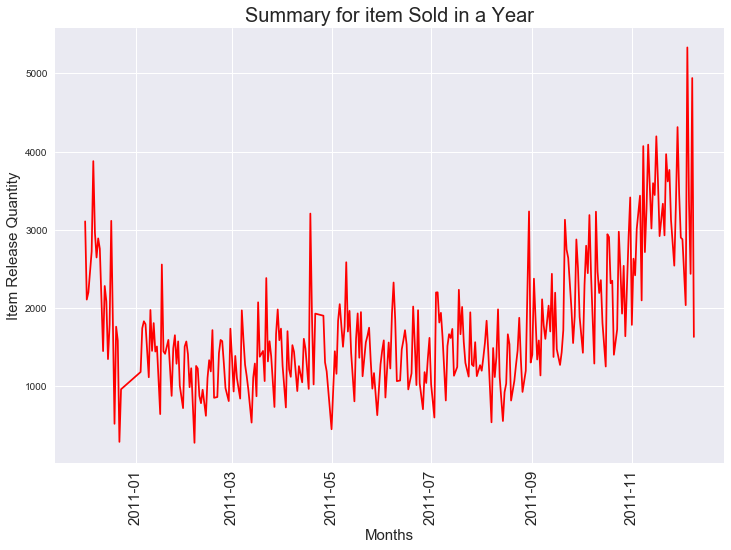

In [6]:
plt.figure(figsize=(12,8))
inv_data.plot(color="red")
plt.xticks(rotation="vertical", fontsize=15)
plt.title("Summary for item Sold in a Year", fontsize=20)
plt.xlabel("Months", fontsize=15)
plt.ylabel("Item Release Quantity", fontsize=15)
plt.show()

# Customer who buy more often

#### Here we can see at the chart below the customer who purchased more using by their Customer ID

In [78]:
custID = df["CustomerID"].value_counts().reset_index()
custID.columns = ["CustID","Items they buyed"]
custID["CustID"] = custID["CustID"].apply(str)
custIDx = custID.sort_values("Items they buyed", ascending=False).head(40)
custIDx.head()

df
df.groupby(['CustomerID'])['B'].sum()

CustomerID
12346.0    0.000000e+00
12347.0    4.310000e+03
12348.0    1.797240e+03
12349.0    1.757550e+03
12350.0    3.344000e+02
12352.0    1.545410e+03
12353.0    8.900000e+01
12354.0    1.079400e+03
12355.0    4.594000e+02
12356.0    2.811430e+03
12357.0    6.207670e+03
12358.0    1.168060e+03
12359.0    6.245530e+03
12360.0    2.662060e+03
12361.0    1.899000e+02
12362.0    5.154580e+03
12363.0    5.520000e+02
12364.0    1.313100e+03
12365.0    3.206900e+02
12367.0    1.689000e+02
12370.0    3.545690e+03
12371.0    1.887960e+03
12372.0    1.298040e+03
12373.0    3.646000e+02
12374.0    7.429300e+02
12375.0    4.554200e+02
12377.0    1.628120e+03
12378.0    4.008620e+03
12379.0    8.502900e+02
12380.0    2.720560e+03
               ...     
18245.0    2.507560e+03
18246.0    5.961000e+02
18248.0    7.830200e+02
18249.0    9.534000e+01
18250.0    3.429200e+02
18251.0    4.314720e+03
18252.0    5.266700e+02
18255.0    1.033000e+02
18256.0   -5.010000e+01
18257.0    2.265380e+03
18259

#   

C:\Users\Daryo\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


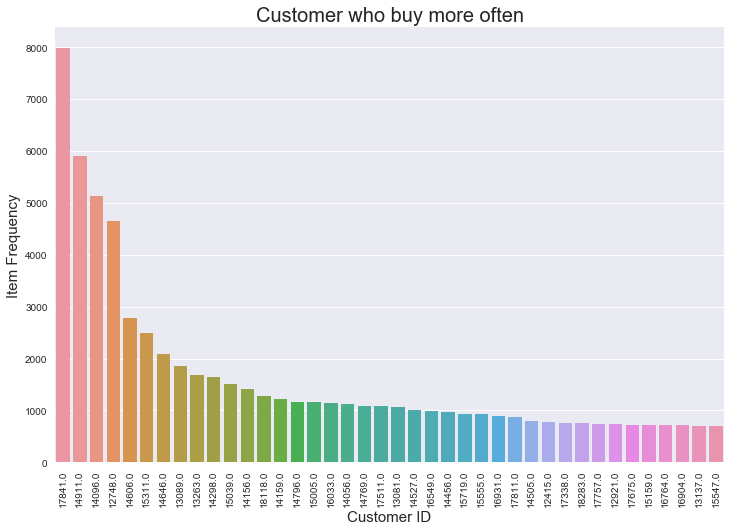

In [8]:
plt.figure(figsize=(12,8))
g = sns.barplot(custIDx.index, custIDx["Items they buyed"])
g.set_xticklabels(custIDx["CustID"], rotation="vertical")
plt.title("Customer who buy more often", fontsize=20)
plt.xlabel("Customer ID", fontsize=15)
plt.ylabel("Item Frequency", fontsize=15)
plt.show()

#  

##### I Add the Total Amount for the item they purchased "Quantity" x "Unit Price" = "Total Amount", so I can graph the total amount they purchased per Customer

In [99]:
custID = df
custID["TotalAmount"] = custID["Quantity"]*custID["UnitPrice"]
custID=custID.groupby(['CustomerID'])['TotalAmount'].sum()
custID=custID.reset_index().sort_values("TotalAmount", ascending=False).head(30)

x= custID['CustomerID'].tolist()
y=custID['TotalAmount'].tolist()

In [10]:
prod_prof["TotalAmount"].sum() # Anually Sale

9747747.9339999985

In [11]:
total_amount = prod_prof.groupby("InvoiceDate")["TotalAmount","Quantity","UnitPrice"].agg({"TotalAmount":["sum","count"],
                                                                   "Quantity":["sum","count"],
                                                                   "UnitPrice":["sum","count"]})
total_amount.head()

TotalAmount       Quantity       UnitPrice      
                    sum count      sum count       sum count
InvoiceDate                                                 
2010-12-01     58635.56  3108    26814  3108  12904.25  3108
2010-12-02     46207.28  2109    21023  2109   6815.68  2109
2010-12-03     45620.46  2202    14830  2202  11114.09  2202
2010-12-05     31383.95  2725    16395  2725   7893.17  2725
2010-12-06     53860.18  3878    21419  3878  17678.78  3878

#   

### As we can see below, the graph tells that the high sale are on the last quarter on the year

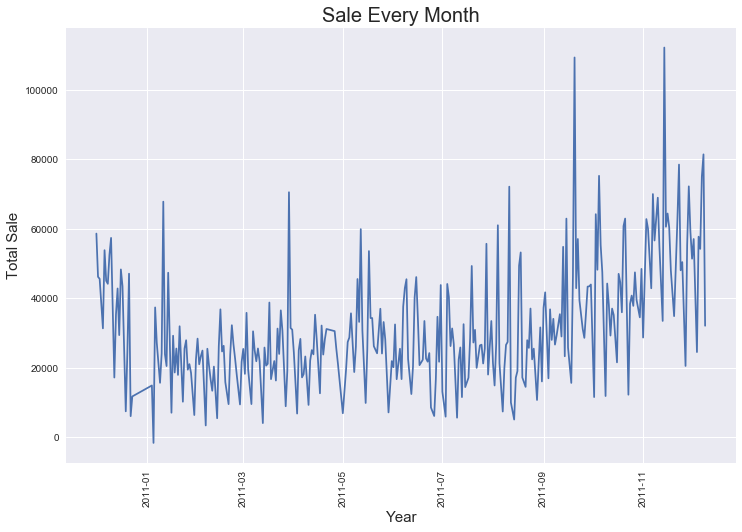

In [12]:
plt.figure(figsize=(12,8))
tA = total_amount["TotalAmount"]["sum"]
tA.plot()
plt.xticks(rotation="vertical")
plt.title("Sale Every Month", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Total Sale", fontsize=15)
plt.show()

#    

# Model for Predicting sale

In [13]:
prod_prof.head()

,InvoiceNo,InvoiceDate,CustomerID,Description,Quantity,UnitPrice,BroughtPrice,Profit,TotalAmount
0,536365,2010-12-01,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,2.040,0.510,15.30
1,536365,2010-12-01,17850.0,WHITE METAL LANTERN,6,3.39,2.712,0.678,20.34
2,536365,2010-12-01,17850.0,CREAM CUPID HEARTS COAT HANGER,8,2.75,2.200,0.550,22.00
3,536365,2010-12-01,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,2.712,0.678,20.34
4,536365,2010-12-01,17850.0,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,2.712,0.678,20.34


#   

#### i clean the datasets here for our models

In [14]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
total_amount.head()

TotalAmount       Quantity       UnitPrice      
                    sum count      sum count       sum count
InvoiceDate                                                 
2010-12-01     58635.56  3108    26814  3108  12904.25  3108
2010-12-02     46207.28  2109    21023  2109   6815.68  2109
2010-12-03     45620.46  2202    14830  2202  11114.09  2202
2010-12-05     31383.95  2725    16395  2725   7893.17  2725
2010-12-06     53860.18  3878    21419  3878  17678.78  3878

In [15]:
y = total_amount["TotalAmount"]["sum"].values
X = total_amount[["Quantity","UnitPrice"]].values

### I Split the datasets by 30%

In [16]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=415)  # i split the datasets here by 30%

In [23]:
'''I am using the SVR Polynomial from the sklearn model, with iteration by 1000 '''
svr_lin = SVR(kernel="poly", C=1e-5, degree=1, max_iter=1000)
svr_lin.fit(train_x, train_y) # i feed the training sets here to our model
yhat = svr_lin.predict(train_x) # and this is the output or a prediction for our training sets
div = len(train_y) # dont mind this
div_len = len(total_amount) # dont mind this

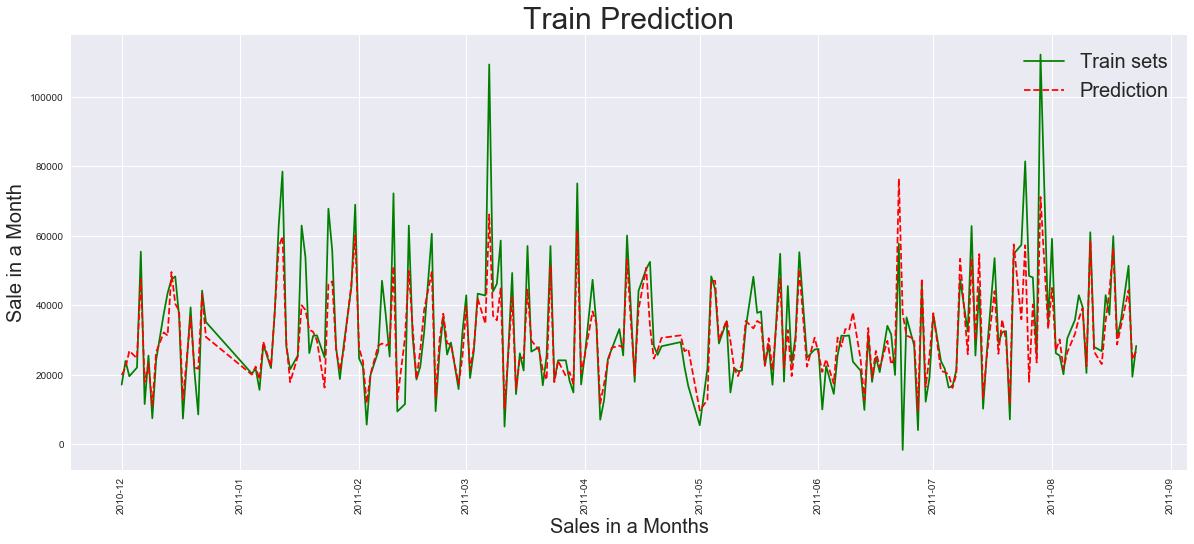

In [24]:
'''This is plotting section'''
fig, ax = plt.subplots(figsize=(20,8))
a = total_amount.index[0:div] # this is the date ex: '2010-10-1, 2010-10-2, 2010-10-3'
ax.plot(a, train_y, "k", label="Train sets", color="green") # i put on the plot for our expected output, this is the color green
ax.plot(a, yhat, "k--", label="Prediction", color="red") # here is the plot for prediction, this is color red in our plot
ax.legend(loc="upper right", shadow=True, fontsize=20)
plt.xticks(rotation="vertical")
plt.title("Train Prediction", fontsize=30)
plt.xlabel("Sales in a Months", fontsize=20)
plt.ylabel("Sale in a Month", fontsize=20)
plt.show()

#### We can see here the postive outcome of our model, the sets are not overfit, so lets check the prediction below for test 

In [25]:
test_yhat = svr_lin.predict(test_x)

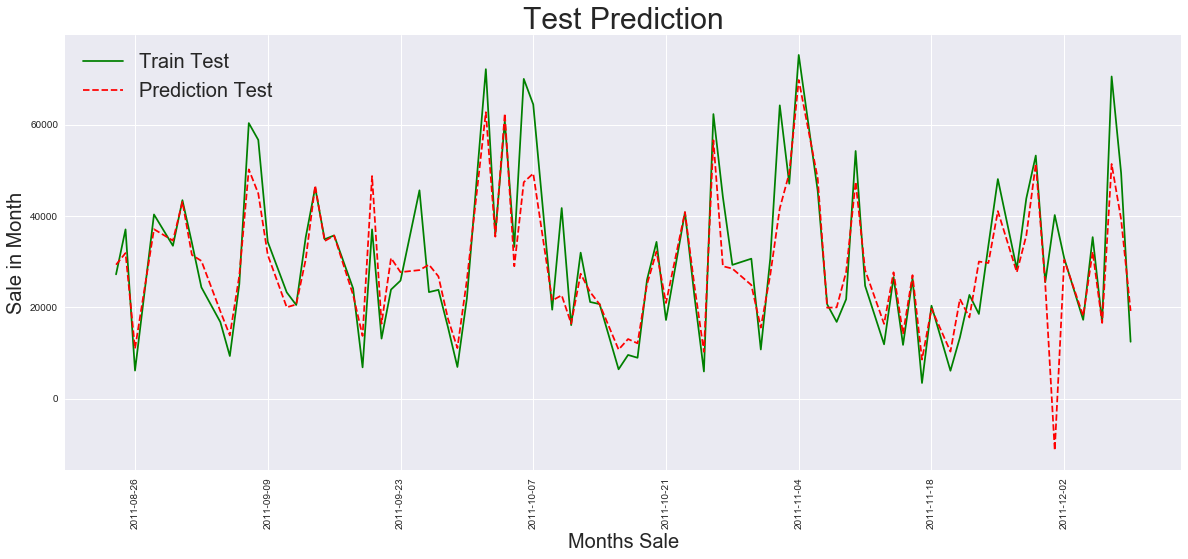

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
a = total_amount.index[div:div_len]
ax.plot(a, test_y, "k", color="green", label="Train Test")
ax.plot(a, test_yhat, "k--", color="red", label="Prediction Test")
ax.legend(loc="upper left", shadow=True, fontsize=20)
plt.title("Test Prediction", fontsize=30)
plt.xticks(rotation="vertical")
plt.xlabel("Months Sale", fontsize=20)
plt.ylabel("Sale in Month", fontsize=20)
plt.show()

#### as we can see in the test sets, our graph for prediction is good, and we have a positive outcome, so we predict the sales by every month and also a year

#    

#    

# Correlation item with other items

In [37]:
prod_prof.head()

,InvoiceNo,InvoiceDate,CustomerID,Description,Quantity,UnitPrice,BroughtPrice,Profit,TotalAmount
0,536365,2010-12-01,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,2.040,0.510,15.30
1,536365,2010-12-01,17850.0,WHITE METAL LANTERN,6,3.39,2.712,0.678,20.34
2,536365,2010-12-01,17850.0,CREAM CUPID HEARTS COAT HANGER,8,2.75,2.200,0.550,22.00
3,536365,2010-12-01,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,2.712,0.678,20.34
4,536365,2010-12-01,17850.0,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,2.712,0.678,20.34


In [22]:
corr = pd.read_csv("datasets//correlation.zip", index_col=0, compression="zip")
corr.head()

,WHITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,JUMBO BAG RED RETROSPOT,PARTY BUNTING,LUNCH BAG RED RETROSPOT,ASSORTED COLOUR BIRD ORNAMENT,SET OF 3 CAKE TINS PANTRY DESIGN,PACK OF 72 RETROSPOT CAKE CASES,LUNCH BAG BLACK SKULL.,NATURAL SLATE HEART CHALKBOARD,...,add stock to allocate online orders,TEA TIME CAKE STAND IN GIFT BOX,PURPLE CHUNKY GLASS+BEAD NECKLACE,rcvd be air temp fix for dotcom sit,Damages/samples,check?,FLOWER FAIRY 5 SUMMER DRAW LINERS,FIRE POLISHED GLASS NECKL GOLD,WHITE ANEMONE ARTIFICIAL FLOWER,Unnamed: 4224
17841.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
14911.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
14096.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
12748.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
14606.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


as we can see above, customer ID brough some items

In [23]:
cor_ = corr.corr()

In [24]:
corr.columns

Index(['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER',
       'JUMBO BAG RED RETROSPOT', 'PARTY BUNTING', 'LUNCH BAG RED RETROSPOT',
       'ASSORTED COLOUR BIRD ORNAMENT', 'SET OF 3 CAKE TINS PANTRY DESIGN ',
       'PACK OF 72 RETROSPOT CAKE CASES', 'LUNCH BAG  BLACK SKULL.',
       'NATURAL SLATE HEART CHALKBOARD ',
       ...
       'add stock to allocate online orders',
       'TEA TIME CAKE STAND IN GIFT BOX', 'PURPLE CHUNKY GLASS+BEAD NECKLACE',
       'rcvd be air temp fix for dotcom sit', 'Damages/samples', 'check?',
       'FLOWER FAIRY 5 SUMMER DRAW LINERS', 'FIRE POLISHED GLASS NECKL GOLD',
       'WHITE ANEMONE ARTIFICIAL FLOWER', 'Unnamed: 4224'],
      dtype='object', length=4224)

C:\Users\Daryo\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


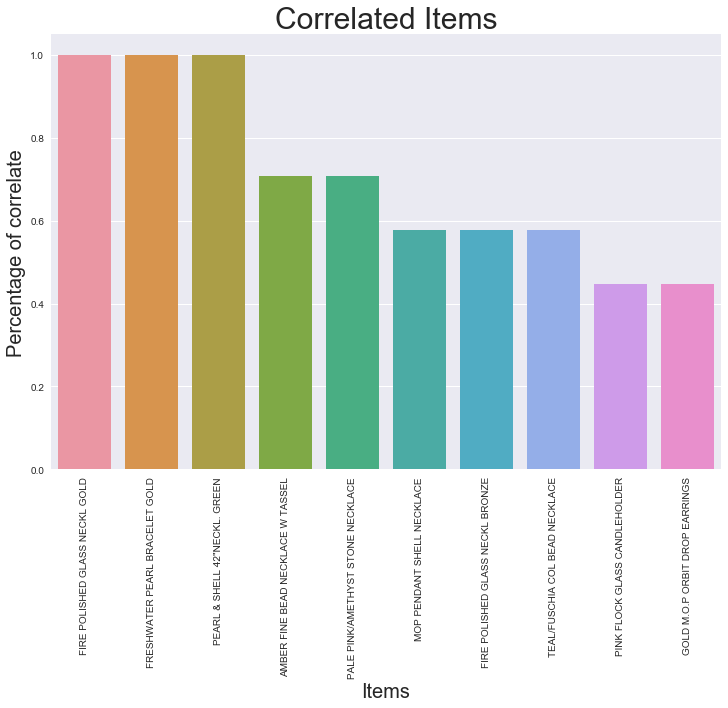

In [26]:
def corr_items(item):
    list_item = cor_[item].sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,8))
    sns.barplot(list_item.index, list_item.values)
    plt.title("Correlated Items", fontsize=30)
    plt.xlabel("Items", fontsize=20)
    plt.ylabel("Percentage of correlate", fontsize=20)
    plt.xticks(rotation="vertical")
    plt.show()
    return

item = "FIRE POLISHED GLASS NECKL GOLD"
corr_items(item)

As per the graph above, if we it can give the correlation items